In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout ,Reshape, MaxPooling1D
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crop_yield.csv")

In [3]:
print(df.dtypes)

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object


In [4]:
df = pd.get_dummies(df, columns=['Crop', 'Season', 'State'])

In [5]:
X = df.drop('Yield', axis=1)
y = df['Yield']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [9]:
basemodel_reg = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1)  # Output layer
])
basemodel_reg.summary()

C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,833 (347.00 KB)

 Trainable params: 88,833 (347.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
basemodel_no_reg = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])
basemodel_no_reg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,833 (347.00 KB)

 Trainable params: 88,833 (347.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_reg = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu', kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output layer
])
model_reg.summary()

C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 95, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 47, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 47, 64)              │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 23, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 11, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,601 (428.13 KB)

 Trainable params: 109,601 (428.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_no_reg = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer
])
model_no_reg.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 95, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 47, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 47, 64)              │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 23, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 11, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,601 (428.13 KB)

 Trainable params: 109,601 (428.13 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
basemodel_no_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model without regularization
history_no_reg1 = basemodel_no_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0090 - loss: 400258.1562 - mae: 51.8325 - val_accuracy: 0.0086 - val_loss: 73360.6016 - val_mae: 22.6794
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0076 - loss: 49087.3203 - mae: 18.9234 - val_accuracy: 0.0046 - val_loss: 32900.7148 - val_mae: 15.9486
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0081 - loss: 26646.4102 - mae: 16.1076 - val_accuracy: 0.0084 - val_loss: 19458.4609 - val_mae: 12.2237
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0077 - loss: 12734.7100 - mae: 11.1490 - val_accuracy: 0.0046 - val_loss: 57407.8516 - val_mae: 23.1259
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0067 - loss: 39483.1992 - mae: 17.1422 - val_accuracy: 0.0036 - val_loss: 19978.0176 - val_mae: 13.4479
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0059 - loss: 17838.3418 - mae: 12.1536 - val_accuracy: 0.0084 - val_loss: 290

In [14]:
basemodel_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model with regularization
history_reg1 = basemodel_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0089 - loss: 535374.9375 - mae: 77.4416 - val_accuracy: 0.0086 - val_loss: 127576.9141 - val_mae: 29.1960
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0072 - loss: 59380.6250 - mae: 23.2613 - val_accuracy: 0.0086 - val_loss: 113544.1953 - val_mae: 30.3030
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0086 - loss: 130992.9609 - mae: 31.9483 - val_accuracy: 0.0086 - val_loss: 42716.2617 - val_mae: 19.8094
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0086 - loss: 33738.3945 - mae: 17.0673 - val_accuracy: 0.0086 - val_loss: 34678.2500 - val_mae: 17.7345
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0090 - loss: 55550.7734 - mae: 24.3720 - val_accuracy: 0.0086 - val_loss: 79649.1094 - val_mae: 26.3697
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0092 - loss: 68777.3047 - mae: 22.1306 - val_accuracy: 0.0086 - val_loss: 

In [15]:
model_no_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model without regularization
history_no_reg = model_no_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0084 - loss: 720797.6250 - mae: 117.6957 - val_accuracy: 0.0086 - val_loss: 428126.6562 - val_mae: 71.3746
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0074 - loss: 331228.9375 - mae: 64.4812 - val_accuracy: 0.0028 - val_loss: 418061.0938 - val_mae: 70.6109
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0072 - loss: 293970.5312 - mae: 58.9056 - val_accuracy: 0.0081 - val_loss: 557041.8750 - val_mae: 72.1870
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0064 - loss: 292595.2812 - mae: 53.5281 - val_accuracy: 0.0086 - val_loss: 344330.8750 - val_mae: 61.1691
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0065 - loss: 339310.1875 - mae: 71.8785 - val_accuracy: 0.0086 - val_loss: 801729.0000 - val_mae: 158.1266
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0094 - loss: 665661.2500 - mae: 138.3988 - val_accuracy: 0.0086 - 

In [16]:
model_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model with regularization
history_reg = model_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0089 - loss: 656366.4375 - mae: 116.7875 - val_accuracy: 0.0086 - val_loss: 604186.0000 - val_mae: 85.0962
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0072 - loss: 482844.9062 - mae: 99.7337 - val_accuracy: 0.0086 - val_loss: 400217.8438 - val_mae: 74.4148
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0070 - loss: 353275.6875 - mae: 74.0553 - val_accuracy: 0.0089 - val_loss: 419718.2500 - val_mae: 68.8728
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0072 - loss: 350601.3750 - mae: 69.0397 - val_accuracy: 0.0086 - val_loss: 438902.8438 - val_mae: 73.9954
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0096 - loss: 336124.3125 - mae: 64.0694 - val_accuracy: 0.0086 - val_loss: 344560.6250 - val_mae: 63.0555
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0070 - loss: 360955.2812 - mae: 72.1556 - val_accuracy: 0.0086 - va

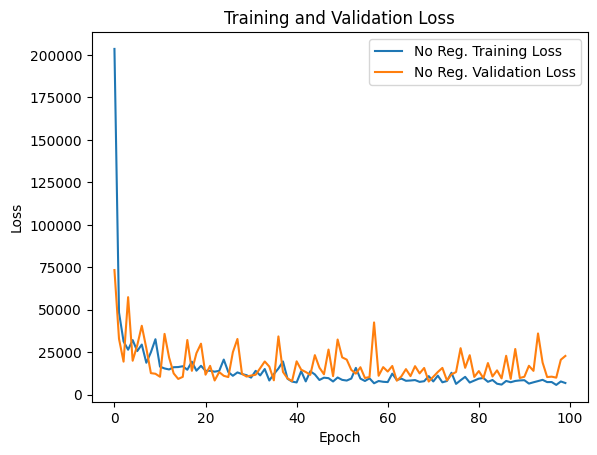

In [17]:
plt.plot(history_no_reg1.history['loss'], label='No Reg. Training Loss')
plt.plot(history_no_reg1.history['val_loss'], label='No Reg. Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

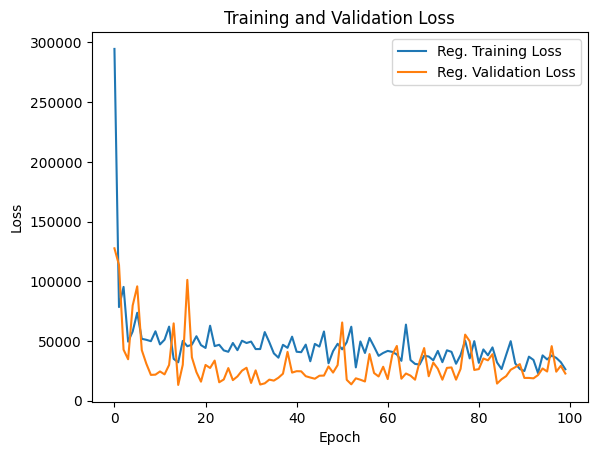

In [18]:
plt.plot(history_reg1.history['loss'], label='Reg. Training Loss')
plt.plot(history_reg1.history['val_loss'], label='Reg. Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

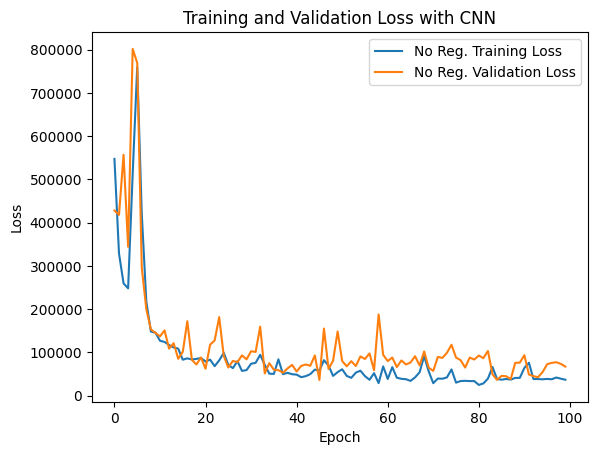

In [19]:
plt.plot(history_no_reg.history['loss'], label='No Reg. Training Loss')
plt.plot(history_no_reg.history['val_loss'], label='No Reg. Validation Loss')
plt.title('Training and Validation Loss with CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

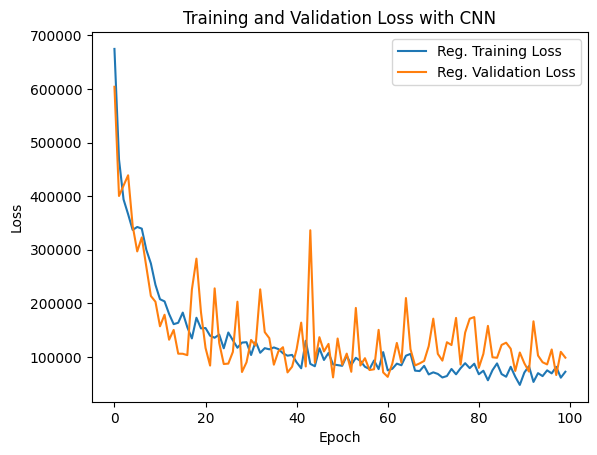

In [20]:
plt.plot(history_reg.history['loss'], label='Reg. Training Loss')
plt.plot(history_reg.history['val_loss'], label='Reg. Validation Loss')
plt.title('Training and Validation Loss with CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
test_loss_reg, test_mae_reg, test_acc_reg = basemodel_no_reg.evaluate(X_test_reshaped, y_test)
print('No Regularization Model : Test MAE:', test_mae_reg, 'Test Accuracy:', test_acc_reg)

test_loss_reg, test_mae_reg, test_acc_reg = basemodel_reg.evaluate(X_test_reshaped, y_test)
print('Regularized Model: Test MAE:', test_mae_reg, 'Test Accuracy:', test_acc_reg)

test_loss_no_reg, test_mae_no_reg, test_acc_no_reg = model_no_reg.evaluate(X_test_reshaped, y_test)
print('No Regularization Model using CNN: Test MAE:', test_mae_no_reg, 'Test Accuracy:', test_acc_no_reg)

test_loss_reg, test_mae_reg, test_acc_reg = model_reg.evaluate(X_test_reshaped, y_test)
print('Regularized Model Using CNN: Test MAE:', test_mae_reg, 'Test Accuracy:', test_acc_reg)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.0077 - loss: 29716.1953 - mae: 13.6742
No Regularization Model : Test MAE: 11.921568870544434 Test Accuracy: 0.008633824065327644
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.0077 - loss: 21763.9004 - mae: 12.9594
Regularized Model: Test MAE: 13.27697467803955 Test Accuracy: 0.008633824065327644
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0077 - loss: 102822.5859 - mae: 18.0234
No Regularization Model using CNN: Test MAE: 15.042840003967285 Test Accuracy: 0.008633824065327644
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0077 - loss: 161529.1094 - mae: 28.8640
Regularized Model Using CNN: Test MAE: 22.72501564025879 Test Accuracy: 0.008633824065327644


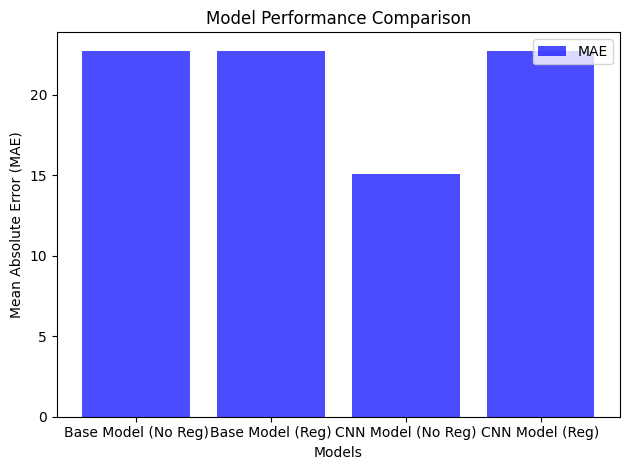

In [23]:
models = ['Base Model (No Reg)', 'Base Model (Reg)', 'CNN Model (No Reg)', 'CNN Model (Reg)']
mae_values = [test_mae_reg, test_mae_reg, test_mae_no_reg, test_mae_reg]
accuracy_values = [test_acc_reg, test_acc_reg, test_acc_no_reg, test_acc_reg]

fig, ax1 = plt.subplots()

ax1.bar(models, mae_values, color='blue', alpha=0.7, label='MAE')
ax1.set_ylabel('Mean Absolute Error (MAE)')


# Set the title and labels
plt.title('Model Performance Comparison')
plt.xlabel('Models')

# Add a legend
plt.legend()

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()